In [1]:
%run '~/git/Bibliotecas.ipynb'

# 1- Exportação de Café por Município da Região de Pouso Alegre

In [2]:
i_f_m_r_pa=pd.read_csv('~/git/Importacao-por-SH-e-Municipio/temp/e_c_m_r_pa.csv')
i_f_m_r_pa.head(1)

,CO_ANO,CO_MES,SH4,CO_PAIS,SG_UF_MUN,CO_MUN,KG_LIQUIDO,VL_FOB,NO_MUN,NO_MUN_MIN,SG_UF,NO_SH4_POR,CO_SH2,NO_SH2_POR
0,1997,3,901,764,MG,3102605,150000,514554,ANDRADAS,Andradas,MG,"Café, mesmo torrado ou descafeinado; cascas e ...",9,"Café, chá, mate e especiarias"


In [3]:
i_f_m_r_pa=i_f_m_r_pa[i_f_m_r_pa.columns[[0,1,2,3,5,6,7,]].tolist()]

In [4]:
# Cria manualmente a tabela de correção do dólar
infl_dolar=pd.DataFrame({
 'CO_ANO':np.arange(1997,2025),
 'FATOR':[0.50,0.50,0.51,0.53,0.55,0.56,0.57,0.59,0.61,\
 0.63,0.64,0.67,0.67,0.68,0.70,0.72,0.73,0.74,\
 0.74,0.75,0.77,0.78,0.80,0.81,0.85,0.92,0.96,1.00]})

i_f_m_r_pa=i_f_m_r_pa.merge(infl_dolar)

i_f_m_r_pa['KG_LIQUIDO_real']=i_f_m_r_pa['KG_LIQUIDO']

i_f_m_r_pa['KG_LIQUIDO']=i_f_m_r_pa['KG_LIQUIDO']/i_f_m_r_pa['FATOR']

In [5]:
i_f_m_r_pa[i_f_m_r_pa.duplicated()]

,CO_ANO,CO_MES,SH4,CO_PAIS,CO_MUN,KG_LIQUIDO,VL_FOB,FATOR,KG_LIQUIDO_real


In [6]:
len(i_f_m_r_pa[i_f_m_r_pa.duplicated(subset=['CO_ANO','CO_MES','CO_PAIS','SH4','CO_MUN'])])

0

In [7]:
i_f_m_r_pa[i_f_m_r_pa.duplicated(subset=['CO_MUN','CO_ANO','CO_MES','SH4','CO_PAIS'])]

,CO_ANO,CO_MES,SH4,CO_PAIS,CO_MUN,KG_LIQUIDO,VL_FOB,FATOR,KG_LIQUIDO_real


In [8]:
i_f_m_r_pa[i_f_m_r_pa.KG_LIQUIDO<=0]

,CO_ANO,CO_MES,SH4,CO_PAIS,CO_MUN,KG_LIQUIDO,VL_FOB,FATOR,KG_LIQUIDO_real
5216,2011,9,901,23,3102605,0.0,6,0.70,0
9931,2019,8,901,427,3151800,0.0,1,0.80,0
10480,2019,8,901,160,3146008,0.0,3568,0.80,0
10660,2020,9,901,69,3108404,0.0,10,0.81,0
10901,2020,8,901,455,3108404,0.0,5,0.81,0
10997,2020,8,901,628,3108404,0.0,10,0.81,0
11058,2020,8,901,375,3108404,0.0,3,0.81,0
11246,2020,8,901,607,3108404,0.0,10,0.81,0
11494,2021,5,901,275,3108404,0.0,10,0.85,0
11933,2021,5,901,240,3102605,0.0,9,0.85,0


Como os registros com 0 KG apresentam também os valores em US$ desprezíveis, eles seráo descartados.

In [9]:
i_f_m_r_pa=i_f_m_r_pa[i_f_m_r_pa.KG_LIQUIDO>0]

In [10]:
i_f_m_r_pa[i_f_m_r_pa.VL_FOB<=0]

,CO_ANO,CO_MES,SH4,CO_PAIS,CO_MUN,KG_LIQUIDO,VL_FOB,FATOR,KG_LIQUIDO_real
10204,2019,9,901,427,3151800,1.25,0,0.8,1


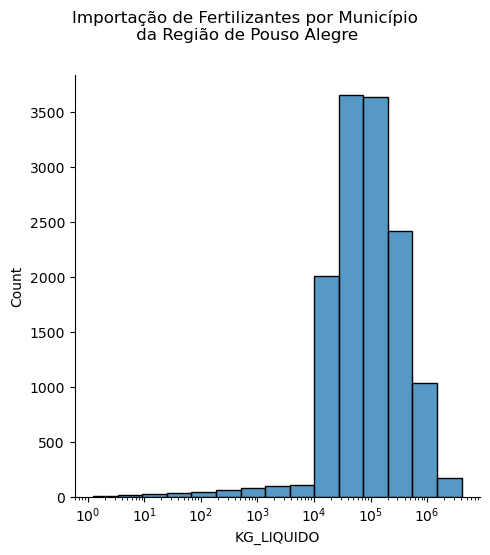

In [11]:
sns.displot(data=i_f_m_r_pa,x='KG_LIQUIDO',log_scale=True, bins=15)\
.fig.suptitle('Importação de Fertilizantes por Município\n da Região de Pouso Alegre',y=1.1)
plt.show()

A distribuição dos valores de peso serão considerados normais.

In [12]:
i_f_m_r_pa=i_f_m_r_pa.assign(descarte_peso='não')

In [13]:
i_f_m_r_pa[i_f_m_r_pa.KG_LIQUIDO<=0]

,CO_ANO,CO_MES,SH4,CO_PAIS,CO_MUN,KG_LIQUIDO,VL_FOB,FATOR,KG_LIQUIDO_real,descarte_peso


In [14]:
i_f_m_r_pa[i_f_m_r_pa.VL_FOB<=0]

,CO_ANO,CO_MES,SH4,CO_PAIS,CO_MUN,KG_LIQUIDO,VL_FOB,FATOR,KG_LIQUIDO_real,descarte_peso
10204,2019,9,901,427,3151800,1.25,0,0.8,1,não


In [15]:
i_f_m_r_pa=i_f_m_r_pa[i_f_m_r_pa.VL_FOB>0]

In [16]:
i_f_m_r_pa.loc[i_f_m_r_pa.KG_LIQUIDO<0,'descarte_peso']='sim'

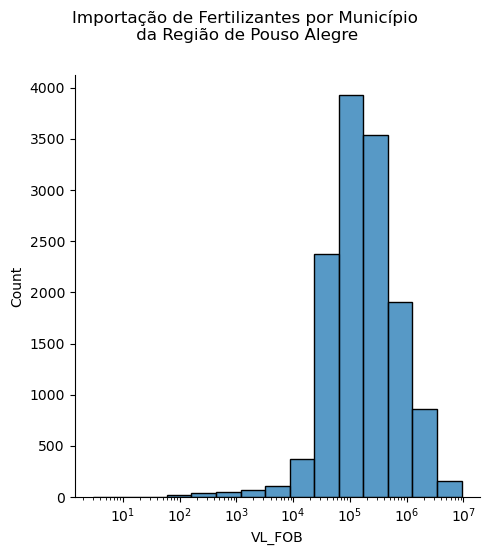

In [17]:
sns.displot(data=i_f_m_r_pa,x='VL_FOB',log_scale=True, bins=15)\
.fig.suptitle('Importação de Fertilizantes por Município\n da Região de Pouso Alegre',y=1.1)
plt.show()

A distribuição dos valores FOB são considerados normais.

In [18]:
i_f_m_r_pa=i_f_m_r_pa.assign(descarte_vl='não')

In [19]:
i_f_m_r_pa.loc[i_f_m_r_pa.KG_LIQUIDO<0,'descarte_vl']='sim'

In [20]:
i_f_m_r_pa[i_f_m_r_pa.descarte_vl=='sim'].head(1)

,CO_ANO,CO_MES,SH4,CO_PAIS,CO_MUN,KG_LIQUIDO,VL_FOB,FATOR,KG_LIQUIDO_real,descarte_peso,descarte_vl


In [21]:
i_f_m_r_pa['US$/KG']=i_f_m_r_pa.VL_FOB/i_f_m_r_pa.KG_LIQUIDO

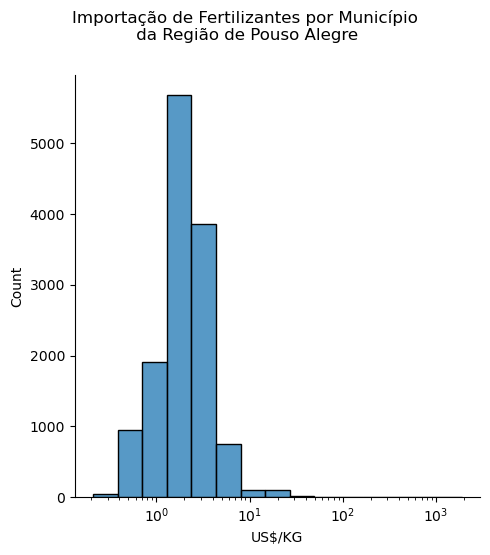

In [22]:
sns.displot(data=i_f_m_r_pa,x='US$/KG',log_scale=True, bins=15)\
.fig.suptitle('Importação de Fertilizantes por Município\n da Região de Pouso Alegre',y=1.1)
plt.show()

Os valores de preço maiores que 10**1.1 não são considerados normais e serão marcados para descarte.

In [23]:
i_f_m_r_pa=i_f_m_r_pa.assign(descarte_preço='não')

In [24]:
i_f_m_r_pa.loc[i_f_m_r_pa['US$/KG']>10**1.1,'descarte_preço']='sim'

In [25]:
i_f_m_r_pa[i_f_m_r_pa.descarte_preço=='sim'].head(1)

,CO_ANO,CO_MES,SH4,CO_PAIS,CO_MUN,KG_LIQUIDO,VL_FOB,FATOR,KG_LIQUIDO_real,descarte_peso,descarte_vl,US$/KG,descarte_preço
3498,2006,2,901,756,3151800,101.587302,1920,0.63,64,não,não,18.9,sim


In [26]:
i_f_m_r_pa[
(i_f_m_r_pa.descarte_peso=='sim')&
(i_f_m_r_pa.descarte_vl=='sim')&
(i_f_m_r_pa.descarte_preço=='sim')
].tipo='descarte_triplo'

In [27]:
i_f_m_r_pa['tipo']='sem_descarte'

In [28]:
i_f_m_r_pa.loc[(i_f_m_r_pa.descarte_peso=='sim')&(i_f_m_r_pa.descarte_vl=='sim')&(i_f_m_r_pa.descarte_preço=='sim'),'tipo']='descarte_triplo'

In [29]:
i_f_m_r_pa.tipo.unique()

array(['sem_descarte'], dtype=object)

In [30]:
i_f_m_r_pa.loc[(i_f_m_r_pa.descarte_peso=='não')&(i_f_m_r_pa.descarte_vl=='sim')&(i_f_m_r_pa.descarte_preço=='sim'),'tipo']='descarte_vl_preço'

In [31]:
i_f_m_r_pa.tipo.unique()

array(['sem_descarte'], dtype=object)

In [32]:
i_f_m_r_pa.loc[(i_f_m_r_pa.descarte_peso=='sim')&(i_f_m_r_pa.descarte_vl=='não')&(i_f_m_r_pa.descarte_preço=='sim'),'tipo']='descarte_peso_preço'

In [33]:
i_f_m_r_pa.tipo.unique()

array(['sem_descarte'], dtype=object)

In [34]:
i_f_m_r_pa.loc[(i_f_m_r_pa.descarte_peso=='não')&(i_f_m_r_pa.descarte_vl=='sim')&(i_f_m_r_pa.descarte_preço=='sim'),'tipo']='descarte_vl_preço'

In [35]:
i_f_m_r_pa.tipo.unique()

array(['sem_descarte'], dtype=object)

In [36]:
i_f_m_r_pa.loc[(i_f_m_r_pa.descarte_peso=='não')&(i_f_m_r_pa.descarte_vl=='não')&(i_f_m_r_pa.descarte_preço=='sim'),'tipo']='descarte_preço'

In [37]:
i_f_m_r_pa.tipo.unique()

array(['sem_descarte', 'descarte_preço'], dtype=object)

In [38]:
i_f_m_r_pa.loc[(i_f_m_r_pa.descarte_peso=='sim')&(i_f_m_r_pa.descarte_vl=='não')&(i_f_m_r_pa.descarte_preço=='não'),'tipo']='descarte_peso'

In [39]:
i_f_m_r_pa.tipo.unique()

array(['sem_descarte', 'descarte_preço'], dtype=object)

In [40]:
i_f_m_r_pa.loc[(i_f_m_r_pa.descarte_peso=='não')&(i_f_m_r_pa.descarte_vl=='sim')&(i_f_m_r_pa.descarte_preço=='não'),'tipo']='descarte_vl'

In [41]:
i_f_m_r_pa.tipo.unique()

array(['sem_descarte', 'descarte_preço'], dtype=object)

In [42]:
i_f_m_r_pa.loc[(i_f_m_r_pa.descarte_peso=='não')&(i_f_m_r_pa.descarte_vl=='não')&(i_f_m_r_pa.descarte_preço=='não'),'tipo']='sem_descarte'

In [43]:
i_f_m_r_pa.tipo.unique()

array(['sem_descarte', 'descarte_preço'], dtype=object)

In [44]:
w=i_f_m_r_pa.copy()

In [45]:
i_f_m_r_pa=i_f_m_r_pa[i_f_m_r_pa.tipo!='descarte_triplo']

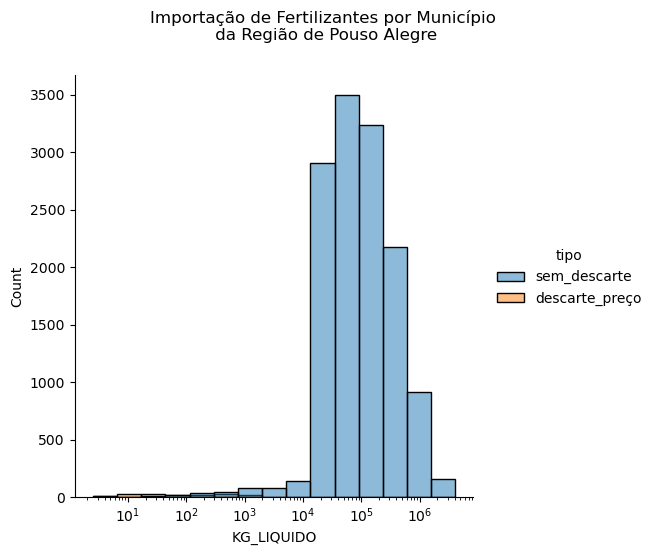

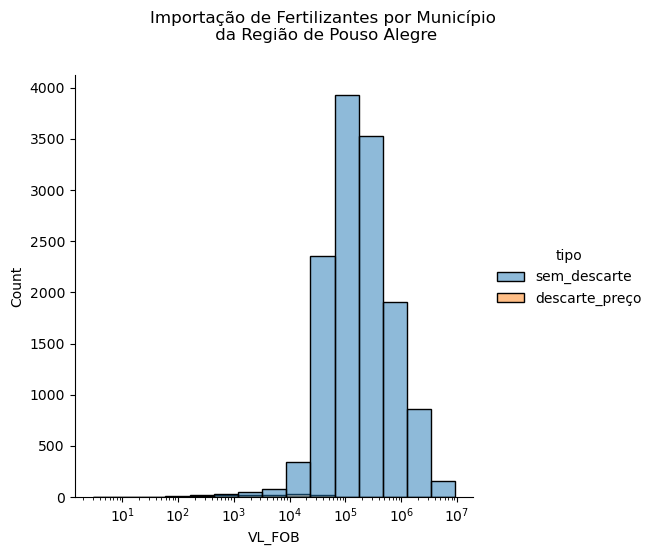

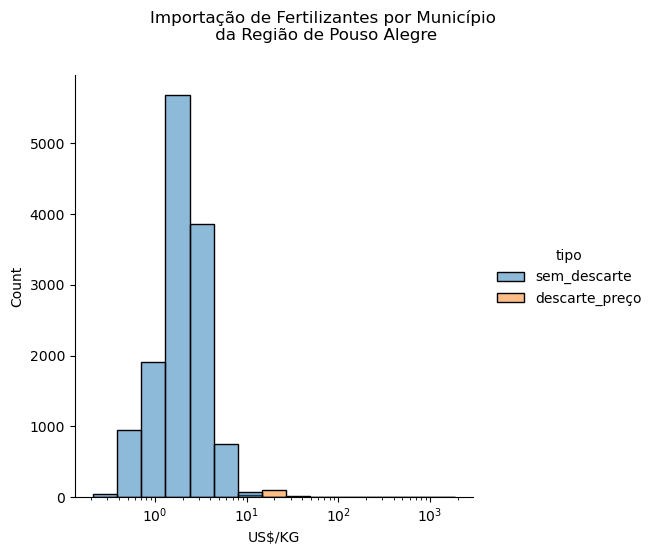

In [46]:
for c in ['KG_LIQUIDO','VL_FOB','US$/KG']:
    sns.displot(data=i_f_m_r_pa,x=c,log_scale=True, hue='tipo', bins=15).fig.suptitle('Importação de Fertilizantes por Município\n da Região de Pouso Alegre',y=1.1)
    plt.show()

Acima nos gráficos odemos observar que , apesar dos registros marcados para descarte serem apresentarem peso anormalmente baixo, os valores declarados são significativos e sistemáticos, dando a impressão de que são pagamaento de bônos de qualidade em cargas anteriores. Por isso, nada será marcado para descarte.

A protuberância a esquerda do gráfico se acredita ser causada pela inflação ao longo dos anos, mas por simplicidade, no momento, não será feita correção da inflação.

Apenas os registros com preço acima de 10**1.2 serão descartados.

In [47]:
i_f_m_r_pa_clean=i_f_m_r_pa[i_f_m_r_pa['US$/KG']<10**1.1]

In [48]:
i_f_m_r_pa_clean.head(1)

,CO_ANO,CO_MES,SH4,CO_PAIS,CO_MUN,KG_LIQUIDO,VL_FOB,FATOR,KG_LIQUIDO_real,descarte_peso,descarte_vl,US$/KG,descarte_preço,tipo
0,1997,3,901,764,3102605,300000.0,514554,0.5,150000,não,não,1.71518,não,sem_descarte


In [49]:
i_f_m_r_pa_clean=i_f_m_r_pa_clean.iloc[:,:7]

In [50]:
i_f_m_r_pa_clean.iloc[:,:5]=i_f_m_r_pa_clean.iloc[:,:5].astype('category')

In [51]:
len(i_f_m_r_pa_clean)

13286

In [52]:
i_f_m_r_pa_clean_sprx=i_f_m_r_pa_clean.groupby(by=i_f_m_r_pa_clean.columns[:5].tolist())[i_f_m_r_pa_clean.columns[5:].tolist()].sum().reset_index()

In [53]:
len(i_f_m_r_pa_clean_sprx)

4814544

In [54]:
i_f_m_r_pa_clean_sprx.head()

,CO_ANO,CO_MES,SH4,CO_PAIS,CO_MUN,KG_LIQUIDO,VL_FOB
0,1997,1,901,17,3101409,0.0,0
1,1997,1,901,17,3102605,0.0,0
2,1997,1,901,17,3104908,0.0,0
3,1997,1,901,17,3108305,0.0,0
4,1997,1,901,17,3108404,0.0,0


In [55]:
i_f_m_r_pa_clean_sprx.to_csv('~/git/Importacao-por-SH-e-Municipio/temp/e_c_m_r_pa_clean_sprx.csv',index=True)